# Avaliação - Dell Academy

## Nessa Análise de sentimnetos  Iremos Usar o Dataset : [MDB 50K *Movie Reviews*](https://www.kaggle.com/atulanandjha/imdb-50k-movie-reviews-test-your-bert). <br/><br/> As Interações com o dataset iram conter: análises e inferências exploratórias dos dados, pré-processamento, treinamento e avaliação do classificador desenvolvido, e visualização dos resultados obtidos.<br/><br/>Iremos  Ultilizar várias bibliotecas para obter o resultado final, sendo elas :

* **Pandas**
* **Seaborn**
* **Matplotlib**
* **Wordcloud**
* **Spacy**
* **numpy**
* **Sklearn**


---

### Primeiramente iremos Importar as Bibliotecas e unir dos datasets de treino e de teste em um só: 

In [1]:
#Importação de bibliotecas que iremos ultilizar!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
from PIL import Image
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from spacy.lang.en import English
import spacy
import warnings
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.base import TransformerMixin
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.svm import LinearSVC 
from sklearn.pipeline import Pipeline 
from spacy.lang.en import English
import en_core_web_sm


In [2]:
#Usado para tirar as mensagens de erros que aparecem após plotar alguns graficos.
warnings.filterwarnings('ignore')

In [3]:
#Lendo os Csv que seram ultilizados nesse analise.
movies = pd.read_csv("train.csv")

In [4]:
#Analisando se existe dados faltantes.
movies.isnull().sum()

text         0
sentiment    0
dtype: int64

In [5]:
#Contando as avaliações possitivas e negativas.
values=movies.sentiment.value_counts()
values



neg    12500
pos    12500
Name: sentiment, dtype: int64

## Vamos representar gráficamente, as análises das reações dos comentários

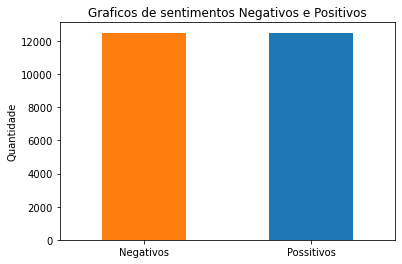

In [6]:
#Plotando a quantidade de reações negativas e positiva.
fig, ax = plt.subplots()
values.plot(kind="bar",ax=ax, color=["#ff7f0e","#1f77b4"])
ax.set_title("Graficos de sentimentos Negativos e Positivos")
ax.set_ylabel("Quantidade")
plt.xticks(rotation=360)

fig.canvas.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'Possitivos'
labels[0] = 'Negativos'

ax.set_xticklabels(labels)
plt.tight_layout;


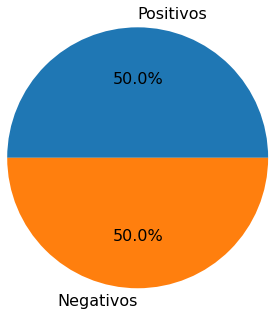

In [7]:
#Plote do grafico de Pizza
movies_sent = movies.groupby(["sentiment"]).size()
movies_sent
plt.pie(movies_sent,labels = ["Positivos","Negativos" ],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()

* O que Podemos entender dessas informações acima é que existem ao todo **50.000** reações. 
 * E que existem **25.000** reações **Positivas**, 
 * e **25.000** reações **Negativas**.

In [8]:
#Descrição dos dados
movies.describe()

,text,sentiment
count,25000,25000
unique,24904,2
top,How has this piece of crap stayed on TV this l...,neg
freq,3,12500


In [9]:
#Mostrando as 3 primeiras linhas com todo o conteudo da linha, na coluna "text".
pd.set_option("max_colwidth", None)
movies[["text"]].head(3)

,text
0,"Now, I won't deny that when I purchased this off eBay, I had high expectations. This was an incredible out-of-print work from the master of comedy that I so enjoy. However, I was soon to be disappointed. Apologies to those who enjoyed it, but I just found the Compleat Al to be very difficult to watch. I got a few smiles, sure, but the majority of the funny came from the music videos (which I've got on DVD) and the rest was basically filler. You could tell that this was not Al's greatest video achievement (that honor goes to UHF). Honestly, I doubt if this will ever make the jump to DVD, so if you're an ultra-hardcore Al fan and just HAVE to own everything, buy the tape off eBay. Just don't pay too much for it."
1,"The saddest thing about this ""tribute"" is that almost all the singers (including the otherwise incredibly talented Nick Cave) seem to have missed the whole point where Cohen's intensity lies: by delivering his lines in an almost tuneless poise, Cohen transmits the full extent of his poetry, his irony, his all-round humanity, laughter and tears in one.<br /><br />To see some of these singer upstarts make convoluted suffering faces, launch their pathetic squeals in the patent effort to scream ""I'm a singer!,"" is a true pain. It's the same feeling many of you probably had listening in to some horrendous operatic versions of simple songs such as Lennon's ""Imagine."" Nothing, simply nothing gets close to the simplicity and directness of the original. If there is a form of art that doesn't need embellishments, it's Cohen's art. Embellishments cast it in the street looking like the tasteless make-up of sex for sale.<br /><br />In this Cohen's tribute I found myself suffering and suffering through pitiful tributes and awful reinterpretations, all of them entirely lacking the original irony of the master and, if truth be told, several of these singers sounded as if they had been recruited at some asylum talent show. It's Cohen doing a tribute to them by letting them sing his material, really, not the other way around: they may have been friends, or his daughter's, he could have become very tender-hearted and in the mood for a gift. Too bad it didn't stay in the family.<br /><br />Fortunately, but only at the very end, Cohen himself performed his majestic ""Tower of Song,"" but even that flower was spoiled by the totally incongruous background of the U2, all of them carrying the expression that bored kids have when they visit their poor grandpa at the nursing home.<br /><br />A sad show, really, and sadder if you truly love Cohen as I do."
2,"Last night I decided to watch the prequel or shall I say the so called prequel to Carlito's Way - ""Carlito's Way: Rise to Power (2005)"" which went straight to DVD...no wonder .....it completely ...and I mean completely S%&KS !!! waist of time watching it and I think it would be a pure waist of time writing about it.... I don't understand how De Palma agreed on producing this sh#t-fest of a movie....except for only one fact that I tip my hat to... Jay Hernandez who plays the young Brigante.... reminded me how De Niro got into the shoes of Brando to portray the young Don Corleone in Godfather II ...but the difference De Niro was amazing and even got an Oscar for it !!! Jay Hernandez well he has guts for trying to be a young Pacino.... too bad for him I don't think he will be playing in film anymore and by the way after I watched this sh#$%ty movie, I sat down and watched the original Carlitos way to get the bad taste out of my mouth."


### Analisando essas linhas percebi que existem algumas tags em html no meio das reações dos filmes.

---

### Agora iremos fazer a  exploração e limpeza dos dados

* **Iremos criar algumas funções para limpeza de dados, para posteriomente toketizar nosso textos.**

In [10]:
# Função para remover tags html e caracteres especiais
import re


def remove_tags(text):
    tags_html = re.compile('<.*?>')
    return tags_html.sub(r'', text)

movies['text'] =movies['text'].apply(remove_tags)


In [11]:
#Aproveitei Tambem para remover caracteres especiais, para deixar os textos mais clean
#Função com uma regex para remover caracters especiais
def remove_caracters(text):
    return re.sub(r"[^^a-zA-Z]"," ",text)

movies['text'] = movies['text'].apply(remove_caracters)

In [12]:
#Função para deixar todo os texto em minusculo
def lower(text):
    return text.lower()
movies['text'] = movies['text'].apply(lower)

## Após a limpeza dos dados os texto da nossa coluna de reções ficaram assim:

In [13]:
movies[['text']].head(3)

,text
0,now i won t deny that when i purchased this off ebay i had high expectations this was an incredible out of print work from the master of comedy that i so enjoy however i was soon to be disappointed apologies to those who enjoyed it but i just found the compleat al to be very difficult to watch i got a few smiles sure but the majority of the funny came from the music videos which i ve got on dvd and the rest was basically filler you could tell that this was not al s greatest video achievement that honor goes to uhf honestly i doubt if this will ever make the jump to dvd so if you re an ultra hardcore al fan and just have to own everything buy the tape off ebay just don t pay too much for it
1,the saddest thing about this tribute is that almost all the singers including the otherwise incredibly talented nick cave seem to have missed the whole point where cohen s intensity lies by delivering his lines in an almost tuneless poise cohen transmits the full extent of his poetry his irony his all round humanity laughter and tears in one to see some of these singer upstarts make convoluted suffering faces launch their pathetic squeals in the patent effort to scream i m a singer is a true pain it s the same feeling many of you probably had listening in to some horrendous operatic versions of simple songs such as lennon s imagine nothing simply nothing gets close to the simplicity and directness of the original if there is a form of art that doesn t need embellishments it s cohen s art embellishments cast it in the street looking like the tasteless make up of sex for sale in this cohen s tribute i found myself suffering and suffering through pitiful tributes and awful reinterpretations all of them entirely lacking the original irony of the master and if truth be told several of these singers sounded as if they had been recruited at some asylum talent show it s cohen doing a tribute to them by letting them sing his material really not the other way around they may have been friends or his daughter s he could have become very tender hearted and in the mood for a gift too bad it didn t stay in the family fortunately but only at the very end cohen himself performed his majestic tower of song but even that flower was spoiled by the totally incongruous background of the u all of them carrying the expression that bored kids have when they visit their poor grandpa at the nursing home a sad show really and sadder if you truly love cohen as i do
2,last night i decided to watch the prequel or shall i say the so called prequel to carlito s way carlito s way rise to power which went straight to dvd no wonder it completely and i mean completely s ks waist of time watching it and i think it would be a pure waist of time writing about it i don t understand how de palma agreed on producing this sh t fest of a movie except for only one fact that i tip my hat to jay hernandez who plays the young brigante reminded me how de niro got into the shoes of brando to portray the young don corleone in godfather ii but the difference de niro was amazing and even got an oscar for it jay hernandez well he has guts for trying to be a young pacino too bad for him i don t think he will be playing in film anymore and by the way after i watched this sh ty movie i sat down and watched the original carlitos way to get the bad taste out of my mouth


In [14]:
text = movies['text']

---

## Agora com nossos textos limpos, iremos toketizar e remover as stopwords dos nossos textos com a biblioteca Spacy.

* **stop words são as palavras sem valor semântico ao que pretendemos fazer, são palavras como "eu", "está", "era", "têm", etc.**

- **Primeiramente iremos remover os Stopwords do nosso texto da coluna de reações**

In [15]:
import en_core_web_sm
nlp = en_core_web_sm.load( disable=['ner', 'parser', 'tagger'])
#nlp = spacy.load('en')

#Pritando as stopwords padroes da bilbioteca spacy
stopwords = list(STOP_WORDS)
print(stopwords)

['within', 'wherein', 'together', 'then', 'must', "'m", 'bottom', 'or', "n't", 'indeed', 'before', 'sometime', 'seemed', 'whereas', 'had', 'until', 'amongst', 'him', 'anywhere', 'whatever', 'in', 'was', 'than', 'sometimes', 'five', 'which', 're', 'an', 'sixty', 'someone', 'that', 'himself', 'much', 'no', 'should', 'her', 'hereby', 'nobody', 'from', 'several', 'often', 'such', 'however', 'only', 'your', 'used', 'being', 'at', 'front', 'hundred', '’d', 'after', 'alone', 'whereby', 'am', 'say', 'mostly', 'up', 'and', 'fifty', 'where', 'neither', 'why', 'not', 'few', 'although', 'nevertheless', 'over', 'meanwhile', 'see', 'make', '’re', 'among', 'have', 'under', 'thereafter', 'on', 'just', 'between', 'its', 'how', 'might', 'amount', 'done', 'so', 'there', 'what', 'herself', 'seeming', 'these', 'down', 'afterwards', 'when', 'through', 'may', 'otherwise', 'has', 'first', 'put', 'somehow', '‘s', 'thereupon', 'could', 'give', 'some', 'without', 'show', 'each', 'moreover', 'a', 'nothing', 'be',

In [16]:
#Agora vamos criar uma classe com as nossas funções de tranformaçao de dados
class transformacao(TransformerMixin):
    #Função de transformação
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    #Função para treino
    def fit(self, X, y, **fit_params):
        return self
    #Função para pegar os parametros
    def get_params(self, deep=True):
        return {}

# Função passica para limpeza dos dados
def clean_text(text):    
    #Removendo espaços e convertendo texto em minúsculas
    return text.strip().lower()

In [17]:
def spacy_tokenizer(doc): return [x.orth_ for x in nlp(doc)]

In [18]:
#termo-frequência
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
tfidf = TfidfVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
#Classificação de vetores de suporte linear.
classifier = LinearSVC()

---

## Agora iremos para nosso treinamento de Máquina.

## Separando nossas variáveis  de treinamento,.

In [19]:
#Passando os dados para as variaveis X e y
X = movies['text']
y = movies['sentiment']

In [20]:
#Dividindo matrizes em subconjuntos aleatórios de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
# Crie o pipeline para limpar, tokenizar, vetorizar e classificar usando "Count Vectorizor"
pipe =Pipeline([("cleaner", transformacao()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])


In [22]:
# Ajustar nossos dados
pipe.fit(X_train,y_train)
# Previsão com os dados de teste
predicoes = pipe.predict(X_test)

In [23]:
for (sample,pred) in zip(X_test,pipe):
    print(sample,"Prediction=>",pred)

i have seen many  many films from china   and hong kong  this is the worst  no  the worst one was  unknown pleasures   i watched  platform  yesterday evening and thought that jia zhang ke s other two films must be better  this evening i was disappointed again  i will not be watching  xiao wu  tomorrow evening because i have just placed all three films in the bin  whoever gave this film   platform  ten out of ten  needs to watch more cinema  the photography was very poor  it was very difficult to differentiate between some of the characters because of the lack of close up work  the storyline was so disjointed that i fast forwarded it towards the end out of pure frustration  i would not recommend this film to anyone  give me zhang yimou or chen kage any day  these are true masters of chinese cinema  not pretentious con men  Prediction=> <__main__.transformacao object at 0x000001D2195A4760>
put quite simply  this film is terrifying it starts off simply  looking like a study of a rebelliou

In [24]:
#Printando a acuracia
print("Accuracy: ",pipe.score(X_test,y_test))

Accuracy:  0.86


## Testando nosso modelo

In [25]:
testes = ['My daughter liked it but I was aghast, that a character in this movie smokes. ',
         'this film is basically a poor take on the old urban legend of the babysitter who gets crank calls telling her to check the children',
         'First of all this movie is a piece of reality very well realized artistically',
         'This movie is excellent in how it portrays the reality of sexual abuse.',
         'I must bad that I didn t get horror to seeing this movie in the bad']

In [26]:

pipe.predict(testes)

array(['pos', 'neg', 'pos', 'pos', 'neg'], dtype=object)

---

---

In [27]:
nlp = spacy.load('en_core_web_sm')

movies['text'] = movies['text'].apply(lambda x: nlp.tokenizer(x))
#Criando uma função para encontrar e remover Stopwords
nlp= spacy.load('en_core_web_sm')
#Passando palavra que são Stopwords
nlp.Defaults.stop_words |= {"film", "movie","scene","character","music"}
all_stopwords = nlp.Defaults.stop_words
movies['text']=movies['text'].apply(lambda x: [w for w in x if not w.text in all_stopwords])
movies[['text']].head(1)

,text
0,"[ , won, t, deny, purchased, ebay, , high, expectations, , incredible, print, work, master, comedy, enjoy, , , soon, disappointed, , apologies, enjoyed, , found, compleat, al, difficult, watch, , got, smiles, , sure, , majority, funny, came, videos, , ve, got, dvd, , rest, basically, filler, , tell, al, s, greatest, video, achievement, , honor, goes, uhf, , honestly, , doubt, jump, dvd, , ultra, hardcore, al, fan, , buy, tape, ebay, , don, t, pay]"


## Criando nossa Wordcloud

* **È um gráfico digital que mostra o grau de frequência das palavras em um texto. Quanto mais a palavra é utilizada, mais chamativa é a representação dessa palavra no gráfico.**

## Agora para nossa melhor compreensão iremos plotar wordcloulds individuais dos sentimentos apresentados, que ou positivos ou negativos. <br/><br/>  Iremos começar pelos negativos.


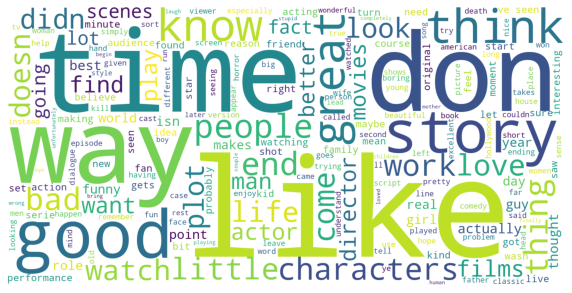

In [28]:
values = ','.join(map(str, movies['text']))
wordcloud = WordCloud(stopwords=values,
                      background_color="white",
                      width=1600, height=800).generate(values)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("imdb_wordcloud.png")